# Inspection for 10-12-2018 Data

The samping rate for EEG is 300Hz, while the one for accelerometer data is **30Hz**

In [112]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv("data/10-12-2018/2018-10-12-preston_walk_raw.csv", ",", skiprows=15)

In [114]:
df.head()

,Time,LE,F4,C4,PO8,PO7,C3,F3,Trigger,Time_Offset,ADC_Status,ADC_Sequence,Event,Comments
0,0.0033,3642.0,-2536.8,3530.1,2459.4,296.7,3454.5,-1103.4,0,6,0,207,0,Start Data Acquisition
1,0.0067,3635.7,-2526.3,3531.0,2451.9,299.7,3459.6,-1098.9,0,12,0,208,0,NaN
2,0.0100,3632.7,-2535.9,3528.6,2441.4,302.1,3454.8,-1103.4,0,18,0,209,0,NaN
3,0.0133,3626.7,-2535.3,3524.1,2450.1,297.9,3455.1,-1097.1,0,24,0,210,0,NaN
4,0.0167,3626.4,-2527.8,3539.4,2469.0,289.8,3452.7,-1089.9,0,30,0,211,0,NaN


In [115]:
acce_df = pd.read_csv("data/10-12-2018/2018-10-12-preston_walk_Accel.csv", ",", skiprows=7)

In [116]:
acce_df.head()

,Time,Ax,Ay,Az,Seq#
0,0.0167,0.3535,-0.0762,0.9424,16
1,0.0500,0.3623,-0.1133,0.9287,16
2,0.0833,0.3428,-0.1826,0.9238,16
3,0.1167,0.3672,-0.2334,0.9277,17
4,0.1500,0.3877,-0.2256,0.9600,17


In [117]:
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

## check Raw EEG

In [118]:
channel_data = df.drop(['Trigger','Time_Offset','ADC_Status','ADC_Sequence','Event','Comments'], axis=1)

In [119]:
channel_data_alt = channel_data.reset_index().melt('Time', var_name='Channel', value_name='Voltage')
channel_data_alt = channel_data_alt[channel_data_alt['Channel'] != 'index']

In [120]:
event_data = df[['Time', 'Event']]
for i in range(len(channel_data.columns) - 1 - 1):
    event_data[str('Event') + str(i)] = event_data.Event
event_data_alt = event_data.reset_index().melt('Time', var_name='Event', value_name='Value')
event_data_alt = event_data_alt[event_data_alt['Event'] != 'index']

/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
channel_data_alt['Event'] = event_data_alt.Value
channel_data_alt.head()

,Time,Channel,Voltage,Event
171832,0.0033,LE,3642.0,0
171833,0.0067,LE,3635.7,0
171834,0.0100,LE,3632.7,0
171835,0.0133,LE,3626.7,0
171836,0.0167,LE,3626.4,0


In [122]:
eeg = alt.Chart(channel_data_alt).mark_line().encode(
    x=alt.X('Time:Q'),
    y=alt.Y('Voltage:Q'),
    color='Channel:N'
)

In [125]:
channel_data_alt_rules = channel_data_alt[channel_data_alt['Event'] != 0]

In [126]:
events = alt.Chart(channel_data_alt_rules).mark_rule().encode(
    x='Time:Q',
    color='Event:N'
)

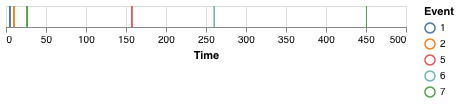

In [127]:
events

In [133]:
fig = alt.layer(events, eeg, width=800, height=500)